<a href="https://colab.research.google.com/github/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/blob/main/Integrated_Retail_Analytics_for_Store_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Advanced Machine Learning
##### **Contribution**    - Individual
##### **Author - Janani Ravi**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[Click here](https://github.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization.git)

# **Problem Statement**


**Write Problem Statement Here.**

# **Implemenation**

## ***1. Know Your Data***

### Import Libraries

In [68]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [69]:
# Load Dataset
features_df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/refs/heads/main/data/Features%20data%20set.csv')
sales_df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/refs/heads/main/data/sales%20data-set.csv')
stores_df=pd.read_csv('https://raw.githubusercontent.com/Jan2309jr/Integrated-Retail-Analytics-for-Store-Optimization/refs/heads/main/data/stores%20data-set.csv')

### Dataset First View

In [70]:
# features data set
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [71]:
# sales data set
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [72]:
# stores data set
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Dataset Rows & Columns count

In [73]:
# Dataset Rows & Columns count
shape_df=pd.DataFrame({
    "Dataset":["Features","Sales","Stores"],
    "Rows":[features_df.shape[0],sales_df.shape[0],stores_df.shape[0]],
    "Columns":[features_df.shape[1],sales_df.shape[1],stores_df.shape[1]],
})
shape_df

,Dataset,Rows,Columns
0,Features,8190,12
1,Sales,421570,5
2,Stores,45,3


### Dataset Information

In [74]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [75]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [76]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### Duplicate Values

In [77]:
# features dataset
features_df.duplicated().sum()

np.int64(0)

In [78]:
# sales dataset
sales_df.duplicated().sum()

np.int64(0)

In [79]:
# stores dataset
stores_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [80]:
# Missing Values/Null Values Count
features_df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [81]:
sales_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [82]:
stores_df.isnull().sum()

,0
Store,0
Type,0
Size,0


<Axes: >

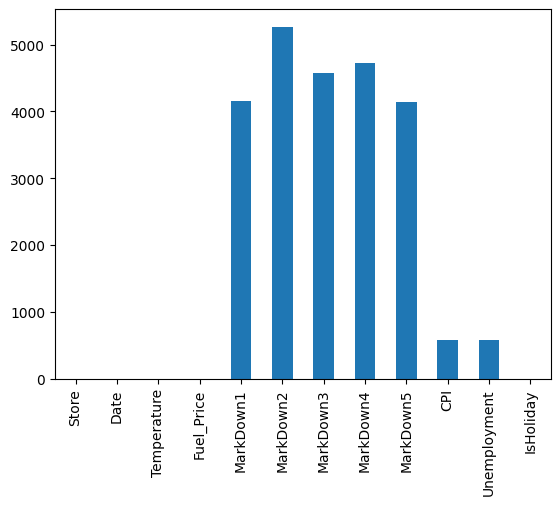

In [83]:
# Visualizing the missing values
features_df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [84]:
# Dataset Columns
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [85]:
sales_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [86]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [87]:
# Dataset Describe
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [88]:
sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [89]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [90]:
# Check Unique Values for each variable.
features_df.nunique()

,0
Store,45
Date,182
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715
MarkDown3,2885
MarkDown4,3405
MarkDown5,4045
CPI,2505


In [91]:
sales_df.nunique()

,0
Store,45
Dept,81
Date,143
Weekly_Sales,359464
IsHoliday,2


In [92]:
stores_df.nunique()

,0
Store,45
Type,3
Size,40


## 3. ***Data Wrangling***

### Handling Missing Values

In [93]:
features_df=features_df.dropna()

In [94]:
features_df.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0
CPI,0


### Handling Date Values

In [95]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False


In [96]:
features_df_copy=features_df.copy()
features_df_copy['Date']=pd.to_datetime(features_df_copy['Date'],dayfirst=True, errors='coerce')

In [97]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [98]:
sales_df_copy=sales_df.copy()
sales_df_copy['Date']=pd.to_datetime(sales_df_copy['Date'],dayfirst=True, errors='coerce')

### **Removing Irrelevant Columns**

In [99]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [103]:
stores_df_copy = stores_df.copy()
stores_df_copy = stores_df_copy.drop(['Store'], axis=1)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Exploratory Data Analysis***

### ***Univariant***

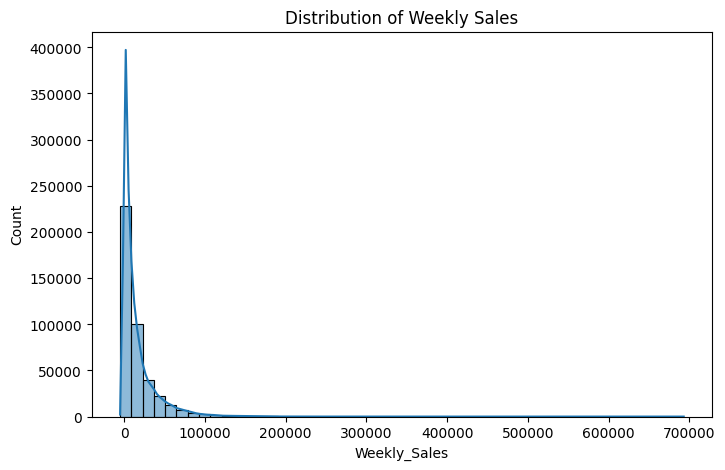

In [104]:
# 1. Univariate - Distribution of Weekly Sales
plt.figure(figsize=(8,5))
sns.histplot(sales_df_copy['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

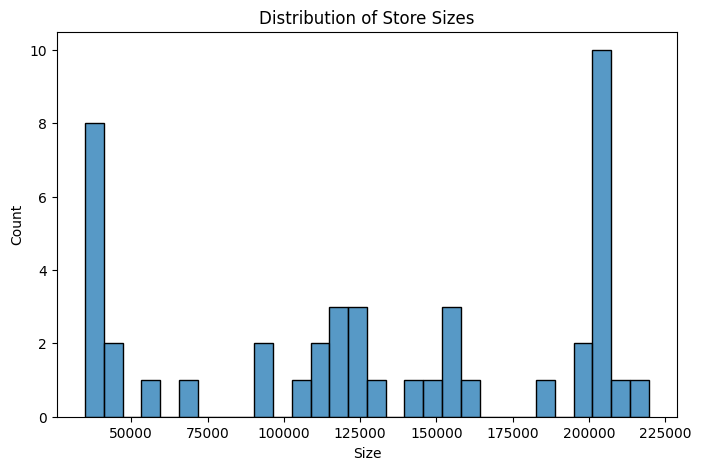

In [105]:
# 2. Univariate - Store Sizes
plt.figure(figsize=(8,5))
sns.histplot(stores_df_copy['Size'], bins=30, kde=False)
plt.title("Distribution of Store Sizes")
plt.show()

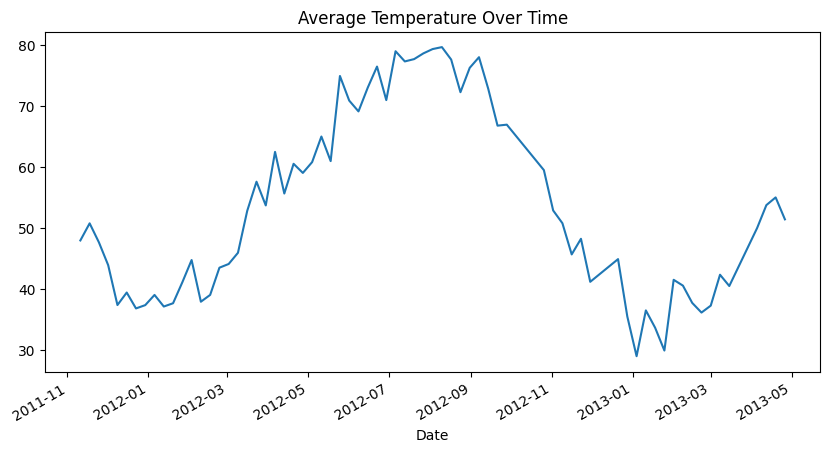

In [106]:
# 3. Univariate - Temperature Trends
plt.figure(figsize=(10,5))
features_df_copy.groupby('Date')['Temperature'].mean().plot()
plt.title("Average Temperature Over Time")
plt.show()

### ***Bivariant***

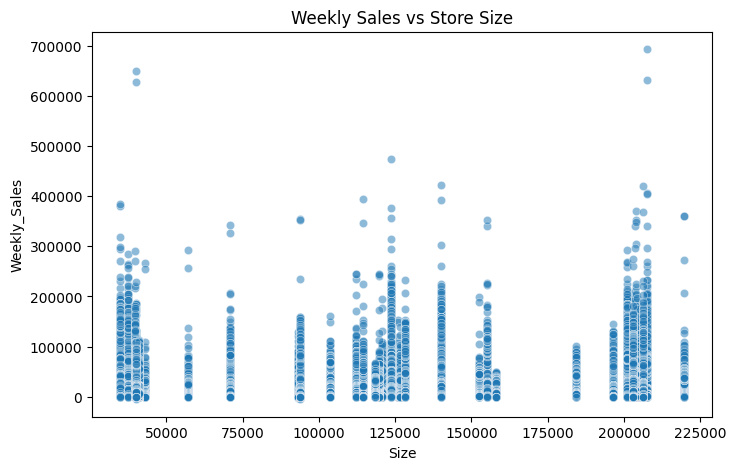

In [107]:
# 4. Bivariate - Weekly Sales vs. Store Size
merged1 = sales_df_copy.merge(stores_df_copy, left_on="Store", right_index=True)
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged1, x="Size", y="Weekly_Sales", alpha=0.5)
plt.title("Weekly Sales vs Store Size")
plt.show()

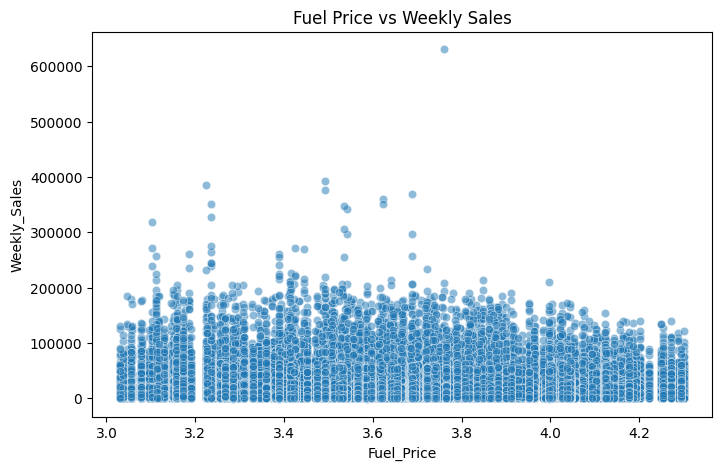

In [108]:
# 5. Bivariate - Fuel Price vs Weekly Sales
merged2 = sales_df_copy.merge(features_df_copy, on=["Store", "Date"], how="inner")
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged2, x="Fuel_Price", y="Weekly_Sales", alpha=0.5)
plt.title("Fuel Price vs Weekly Sales")
plt.show()

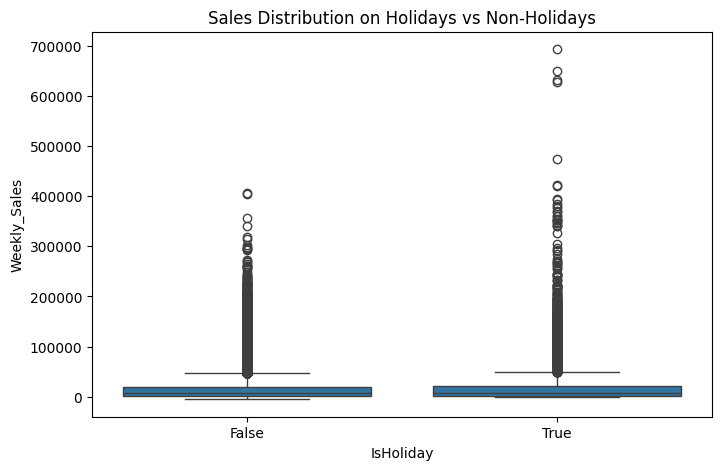

In [109]:
# 6. Bivariate - Holiday effect on Sales
plt.figure(figsize=(8,5))
sns.boxplot(data=sales_df_copy, x="IsHoliday", y="Weekly_Sales")
plt.title("Sales Distribution on Holidays vs Non-Holidays")
plt.show()

### ***Multivariant***

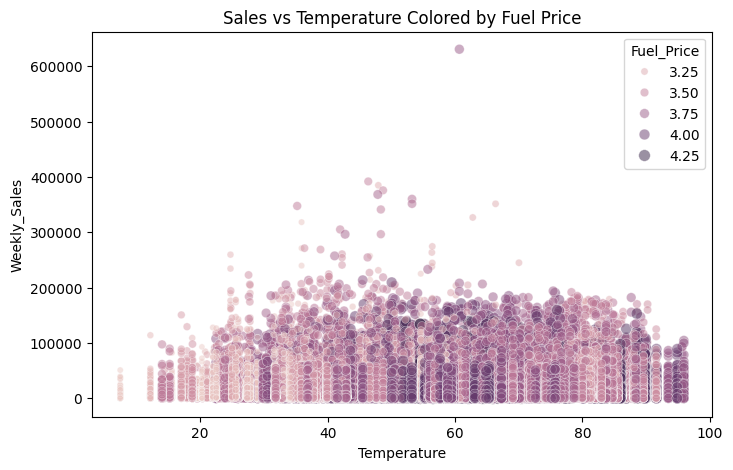

In [110]:
# 7. Multivariate - Sales, Temperature, Fuel Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged2, x="Temperature", y="Weekly_Sales", hue="Fuel_Price", size="Fuel_Price", alpha=0.5)
plt.title("Sales vs Temperature Colored by Fuel Price")
plt.show()

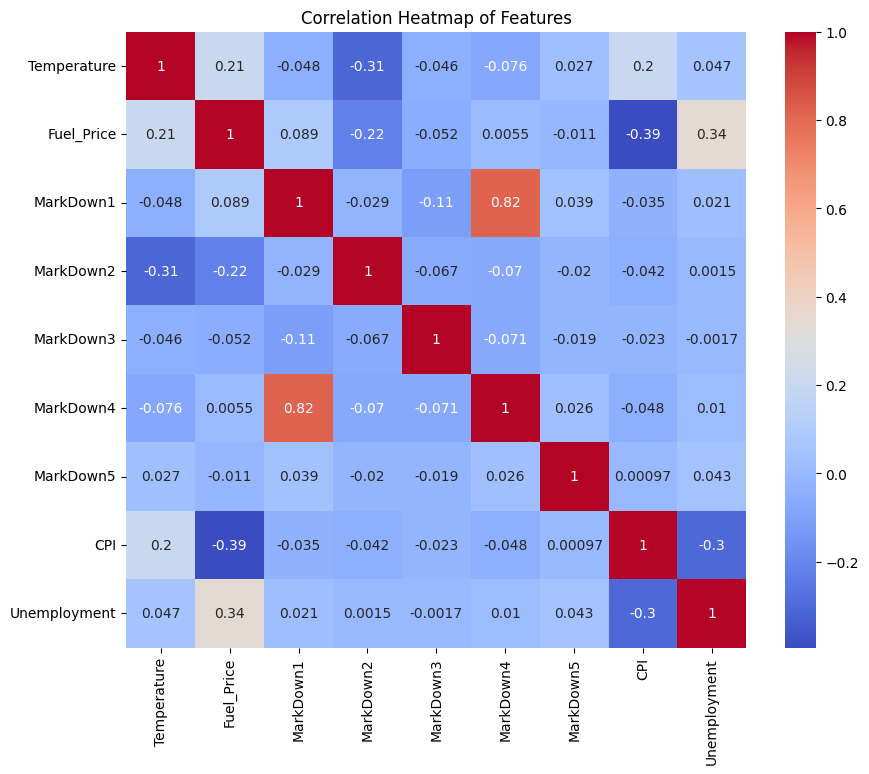

In [111]:
# 8. Multivariate - Correlation heatmap of Features
plt.figure(figsize=(10,8))
sns.heatmap(features_df_copy.drop(columns=['Store','Date','IsHoliday']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

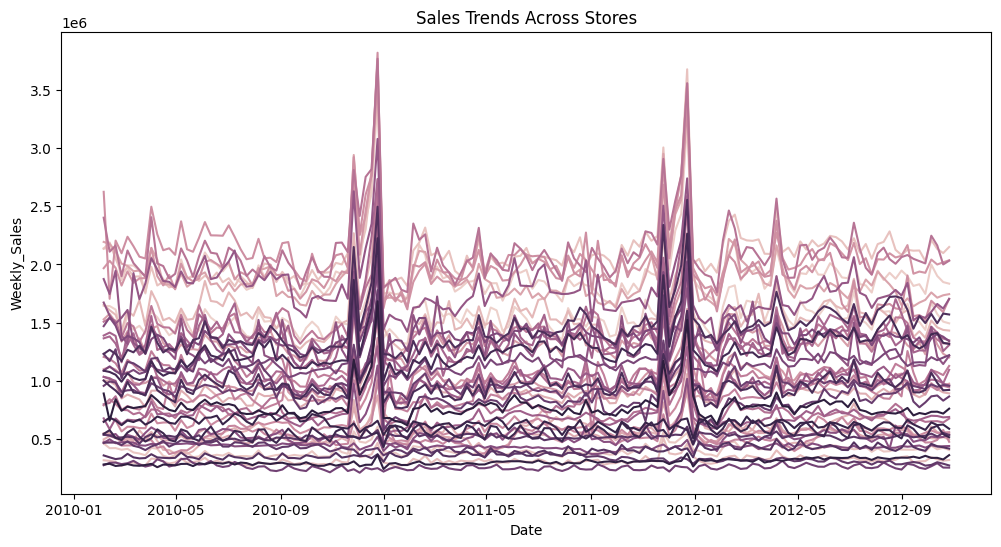

In [112]:
# 9. Multivariate - Sales Trend Across Stores
sales_trend = sales_df_copy.groupby(['Date','Store'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trend, x="Date", y="Weekly_Sales", hue="Store", legend=False)
plt.title("Sales Trends Across Stores")
plt.show()

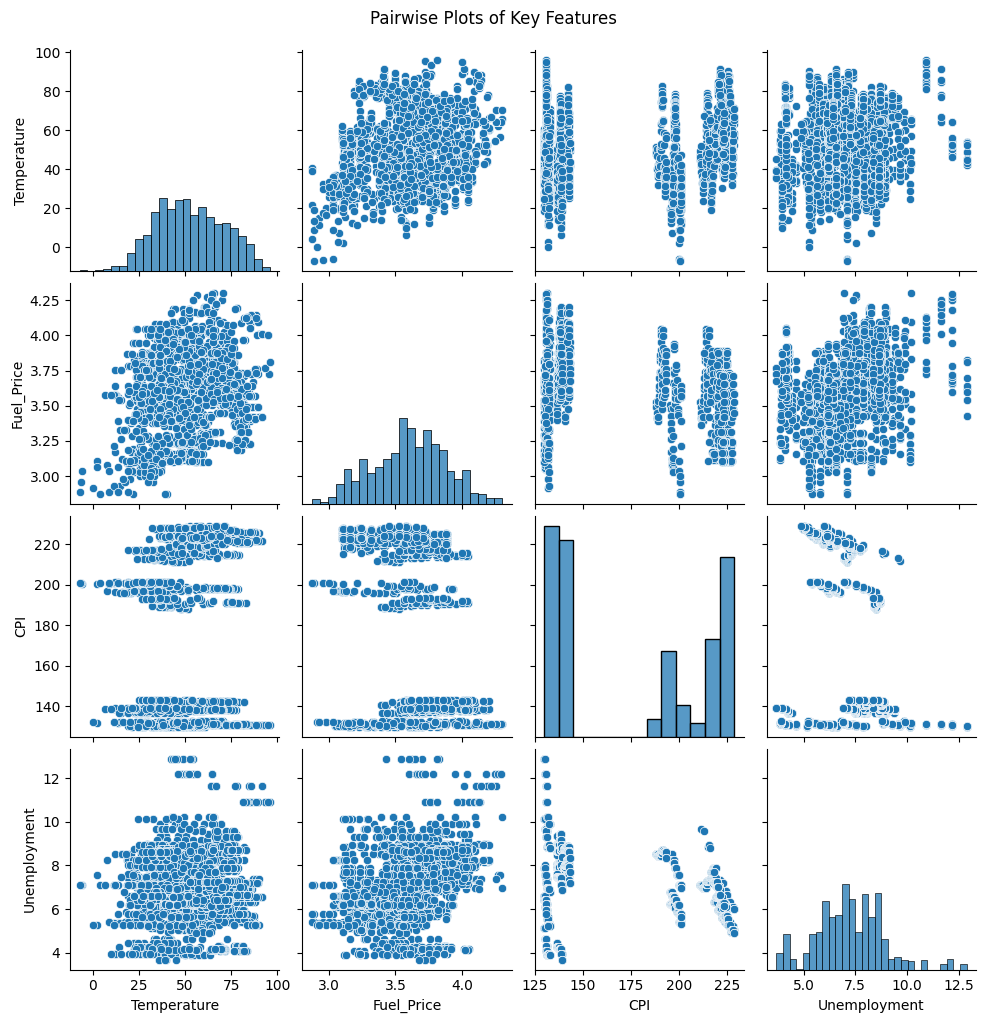

In [113]:
# 10. Multivariate - Pairplot of Numerical Features
sns.pairplot(features_df_copy[['Temperature','Fuel_Price','CPI','Unemployment']])
plt.suptitle("Pairwise Plots of Key Features", y=1.02)
plt.show()

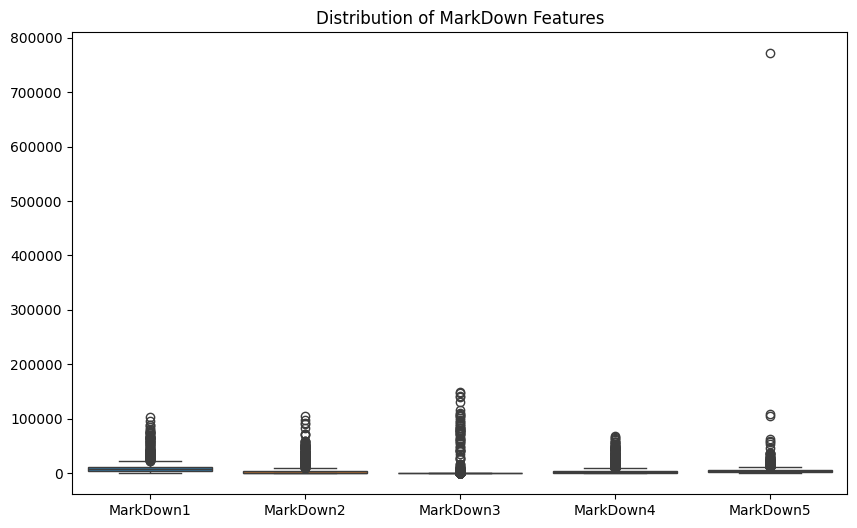

In [114]:
# 11. Multivariate - MarkDowns effect
markdowns = features_df_copy[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
plt.figure(figsize=(10,6))
sns.boxplot(data=markdowns)
plt.title("Distribution of MarkDown Features")
plt.show()

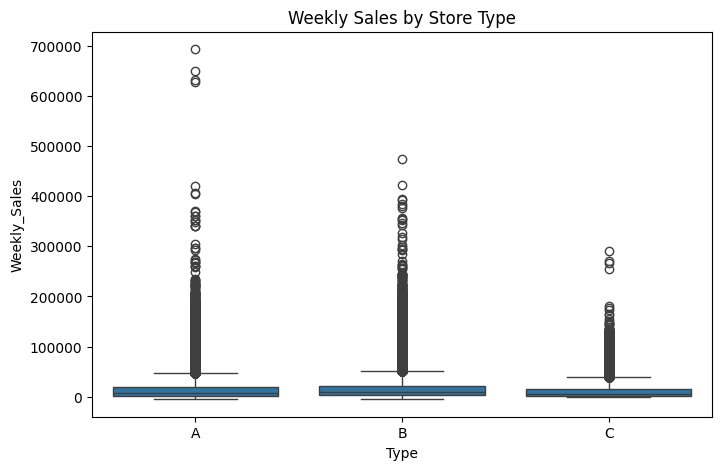

In [115]:
# 12. Multivariate - Store Type vs Weekly Sales
merged3 = sales_df_copy.merge(stores_df_copy, left_on="Store", right_index=True)
plt.figure(figsize=(8,5))
sns.boxplot(data=merged3, x="Type", y="Weekly_Sales")
plt.title("Weekly Sales by Store Type")
plt.show()

## ***5. Hypothesis Testing***

**Univariate insights → Hypotheses**

1. Weekly sales are highly skewed → A small fraction of departments or stores may be responsible for most revenue.
2. Store sizes are unevenly distributed → Larger stores may naturally generate higher sales.
3. Temperature varies seasonally → Seasonal effects could drive demand for certain products.

**Bivariate insights → Hypotheses**
1. Store size vs weekly sales shows positive relationship → Bigger stores sell more, controlling for holiday effects.
2. Fuel price vs weekly sales shows weak or no clear trend → Customer shopping behavior may not depend directly on fuel costs.
3. Holiday weeks show higher median sales → Promotions and holiday traffic significantly boost revenue.

**Multivariate insights → Hypotheses**
1. Temperature and fuel price jointly impact sales volatility → Warmer weeks with low fuel price may increase store visits.
2. MarkDown campaigns have mixed effects across categories → Some markdowns correlate strongly with spikes in sales, others show little impact.
3. CPI and unemployment correlate with weekly sales → Higher unemployment may depress sales regardless of promotions.
4. Store type (A, B, etc.) moderates sales patterns → Type A stores outperform B, suggesting structural differences (location, size, assortment).
5. Time-series trends suggest long-term growth is uneven → Certain stores consistently outperform across years, hinting at local demographic or competition factors.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.